In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

# 2. Missing Values

Qué puedes decir de los datos, distribuciones, missing,
u otros? ¿Hay algo que te llame la atención? ¿Por qué hay tantos valores missing? 

In [2]:
DATA_PATH = "caudal_extra.csv" 
df = pd.read_csv(
 DATA_PATH,
 sep=',',
 header=0,
 index_col=0,
 parse_dates=True,
 na_values=['-']) 

In [3]:
print(df.head)

<bound method NDFrame.head of          codigo_estacion institucion   fuente                     nombre  \
0                4540001         DGA  dga_web     Rio Grande En Paloma 1   
1                4540001         DGA  dga_web     Rio Grande En Paloma 1   
2                4540001         DGA  dga_web     Rio Grande En Paloma 1   
3                4540001         DGA  dga_web     Rio Grande En Paloma 1   
4                4540001         DGA  dga_web     Rio Grande En Paloma 1   
5                4540001         DGA  dga_web     Rio Grande En Paloma 1   
6                4540001         DGA  dga_web     Rio Grande En Paloma 1   
7                4540001         DGA  dga_web     Rio Grande En Paloma 1   
8                4540001         DGA  dga_web     Rio Grande En Paloma 1   
9                4540001         DGA  dga_web     Rio Grande En Paloma 1   
10               4540001         DGA  dga_web     Rio Grande En Paloma 1   
11               4540001         DGA  dga_web     Rio Gran

Luego de importar la  tabla, se pueden analizar las variables que se tienen, que corresponden a 

,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_sub_cuenca,cantidad_observaciones,fecha,caudal,gauge_id,gauge_name,precip_promedio,temp_max_promedio

En particular, me interesa comprobar las mediciones de los sensores, que podrian presentar anomalias. Esto corresponde a 
caudal, precip_promedio y temp_max_promedio, por  lo que se revisaran estas medidas.

In [4]:
#  revisa si algun valor de la columna es NaN
def check_nan(df,columna):
    print(df[columna].describe())
    print("# entradas null: ",end="")
    print(df[columna].isnull().sum())

## Caudal Check

In [5]:
check_nan(df,"caudal")

count    1.411180e+06
mean     9.552229e+01
std      2.526337e+02
min      0.000000e+00
25%      1.250000e+00
50%      8.950000e+00
75%      6.970000e+01
max      1.580500e+04
Name: caudal, dtype: float64
# entradas null: 0


No se encuentran valores NaN

# Temperatura Check

In [6]:
check_nan(df,"temp_max_promedio")

count    1.259617e+06
mean     1.921110e+01
std      7.307081e+00
min     -1.905000e+01
25%      1.370000e+01
50%      1.908429e+01
75%      2.520000e+01
max      4.150000e+01
Name: temp_max_promedio, dtype: float64
# entradas null: 151563


## Precipitacion Check

In [7]:
check_nan(df,"precip_promedio")

count    1.383413e+06
mean     1.921009e+00
std      7.361936e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.586000e+02
Name: precip_promedio, dtype: float64
# entradas null: 27767


Se reemplazan estos valores por un valor arbitrario

In [8]:
values = {'caudal': 1, 'temp_max_promedio': 1, 'precip_promedio': 1}
df = df.fillna(value=values)

#  3. Plot de estaciones

Se grafica  lo pedido, con los datos normalizados con los promedios 

In [9]:
# filtra los datos de una estacion.
def filtrar_una_estacion(df, codigo_estacion):
    cond1 = df["codigo_estacion"] == codigo_estacion
    return (df[cond1])
    

In [10]:
# filtra los datos de una estacion entre las fechas  dadas
def filtrar_estacion_y_fecha(df, codigo_estacion,fecha_min,fecha_max):
    cond1 = df["codigo_estacion"] == codigo_estacion
    cond2  = df["fecha"] > fecha_min
    cond3  = df["fecha"] < fecha_max
    
    return df[cond1 & cond2 & cond3]
    

In [11]:
# grafica varios datos de todas las columnas recibidas en una lista
def plot_estacion(df_original, codigo_estacion, columnas_graficar_list, fecha_min,fecha_max):
    columnas_copiar = columnas_graficar_list.copy()
    columnas_copiar.append("codigo_estacion")
    columnas_copiar.append("fecha")
    
    #  se  copia el  df 
    df = df_original[columnas_copiar].copy() 
    df = filtrar_estacion_y_fecha(df, codigo_estacion, fecha_min,fecha_max)
    print("Done Filtering")

    
    plt.figure()
    # setea la  fecha como index
    df.set_index('fecha', inplace=True)
    df.index = pd.to_datetime(df.index)
    print("Done Indexing")


    for columna in columnas_graficar_list:

        #   factor de normalizacion
        factor_normalizacion = df[columna].quantile(0.95)
        df[columna] =df[columna]/(factor_normalizacion)

    print("Done Normalizing")
    plt.figure()


    ax = df[columnas_graficar].plot(figsize=(10,10))
    
    ax.set_xlabel('Fecha')
    ax.set_ylabel('Valor  Normalizado')
    ax.set_title("Estacion "+str(codigo_estacion))
    ax.legend(columnas_graficar, loc='best')


    plt.show()

In [12]:
# funcion que filtra segun epoca del  ano [verano, otono,  invierno, primavera]
def filtrar_epoca_del_ano(df, epoca_ano):
    meses = pd.DatetimeIndex(df['fecha']).month
    if(epoca_ano=="verano"): 
        cond = (meses ==   1) | (meses == 2) | (meses == 3) 
    elif(epoca_ano=="otono"): 
        cond = (meses ==   4) | (meses == 5) | (meses == 6) 
    elif(epoca_ano=="invierno"): 
        cond = (meses ==   7) | (meses == 8) | (meses == 9) 
    elif(epoca_ano=="primavera"): 
        cond = (meses ==   10) | (meses == 11) | (meses == 12) 
    else:
        print("error, input incorrecto")

    
    return df[cond]

Done Filtering
Done Indexing
Done Normalizing


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

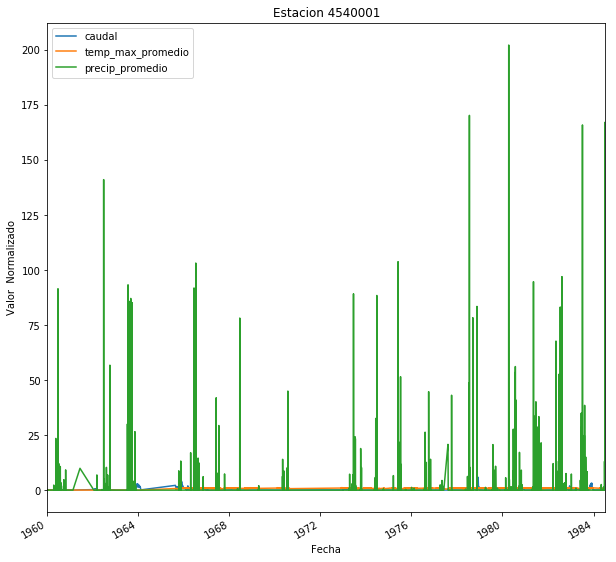

In [13]:
columnas_graficar= ["caudal","temp_max_promedio","precip_promedio"]

# se grafica una estacion, por ejemplo
plot_estacion(df, 4540001,columnas_graficar,"1950-01-06 00:00:00+00:00","2019-01-06 00:00:00+00:00")

# 4 variables extremas

Se definen variables por estacion y epoca del año.  Por simplicidad, se toma que Verano inicia el 1 de Enero. Por lo tanto, 

-Ene-Feb-Mar son Verano. 
-y asi se sigue con Otoño, Invierno y Primavera.

A partir de esto ,  se  calcularann las variables  pedidas
caudal_extremo
temp_extremo
precip_extremo

In [14]:
def calcular_eventos_extremos(df, columna):
    # devuelve 1 y 0 s si los valores estan sobre el 95% threshold
    threshold = df[columna].quantile(0.95)
    return (df[columna]>threshold).astype(int)

In [ ]:
def calcular_eventos_extremos_columna_list(df, columnas_list):
    bool_first_iteration = True
    for  columna in columnas_list:
        if(bool_first_iteration):
            df_res = calcular_eventos_extremos(df,columna)
            bool_first_iteration = False
        else:
            df_aux = calcular_eventos_extremos(df,columna)
            df_res = pd.concat([df_res, df_aux])
            
    
    return df_res

In [16]:
# prueba con datos de verano
# datos_verano= filtrar_epoca_del_ano(df_estacion,"invierno")
# calcular_eventos_extremos(datos_verano,"caudal")

La medida parece razonable, dado a que cada cuenca es distinta, y que la  estacionalidad del  año nos interersa. Sin embargo, trataria de ver una estacionalidad mas grande para definir el valor extremo, quizas Verano-Primavera vs otoño-Invierno, especialmente para precipitaciones.

# 5 Analisis de caudal extremo

Vamos a analizar que pasa con el caudal extemo. para ver esto, vamos a calcular el vector de caudales extremos para algunas estaciones, viendo el valor del  caudal extremo. 


# 6 Evolucion de eventos extremos en el  tiempo

La metodologia de calculo de un evento extremo fue con el percentil95 de cada subestacion para cada epoca del año. Lo que queremos ver, es agregar esta informacion, y ver cuantos eventos extremos al   año en su totalidad. Esto permitira ver si hay años mas extremos que otros (que se podrian explicar por fenomenos climaticos  como el  niño o la niña), o si existen anormalidades.

In [33]:
def calcular_y_agregar_columna_extremo(df, columna):
    
    begin_Iteration =  False
    codigo_estacion_values_list = df["codigo_estacion"].unique()
    estaciones_count = len(codigo_estacion_values_list)

    contador = 0
    print("Iniciando calculo "+columna)
    for codigo_estacion_value in codigo_estacion_values_list:
        
        df_estacion = filtrar_una_estacion(df,codigo_estacion_value)

        datos_v= calcular_eventos_extremos(filtrar_epoca_del_ano(df_estacion,"verano"),columna)
        datos_o= calcular_eventos_extremos(filtrar_epoca_del_ano(df_estacion,"otono"),columna)
        datos_i= calcular_eventos_extremos(filtrar_epoca_del_ano(df_estacion,"invierno"),columna)
        datos_p= calcular_eventos_extremos(filtrar_epoca_del_ano(df_estacion,"primavera"),columna)
        result = pd.concat([datos_v, datos_o,datos_i,datos_p])
                                           

        if(not begin_Iteration):
            result_df = result
            begin_Iteration =True
        else:
            result_df = pd.concat([result_df, result])
            contador += 1
            aux = round(100*contador/estaciones_count,0)
            if(aux%10==0):
                print(str(aux)+" % listo")
                                           

    print("100 % listo")
    df[columna+"_extremo"] = result_df
    return df
                                           
                                           

In [37]:
begin_Iteration =  False
# codigo_estacion_values_list = [4540001,10414001]

codigo_estacion_values_list = df["codigo_estacion"].unique()
estaciones_count = len(codigo_estacion_values_list)

contador = 0

for codigo_estacion_value in codigo_estacion_values_list:
    df_estacion = filtrar_una_estacion(df,codigo_estacion_value)
    
    datos_v= calcular_eventos_extremos(filtrar_epoca_del_ano(df_estacion,"verano"),"caudal")
    datos_o= calcular_eventos_extremos(filtrar_epoca_del_ano(df_estacion,"otono"),"caudal")
    datos_i= calcular_eventos_extremos(filtrar_epoca_del_ano(df_estacion,"invierno"),"caudal")
    datos_p= calcular_eventos_extremos(filtrar_epoca_del_ano(df_estacion,"primavera"),"caudal")
    result = pd.concat([datos_v, datos_o,datos_i,datos_p])
#     print("Estacion "+str(codigo_estacion_value)+" lista")
    if(not begin_Iteration):
        result_df = result
        begin_Iteration =True
    else:
        result_df = pd.concat([result_df, result])
        contador += 1
        aux = round(100*contador/estaciones_count,0)
        if(aux%10==0):
            print(str(aux)+" % listo")  
            
print("100 % listo")

10.0 % listo
20.0 % listo
20.0 % listo
30.0 % listo
40.0 % listo
50.0 % listo
50.0 % listo
60.0 % listo
70.0 % listo
80.0 % listo
80.0 % listo
90.0 % listo
100 % listo


In [35]:
# result_df = result_df.sort_index()
# result_df
# df["caudal_extremo"] = result_df
# df

df = calcular_y_agregar_columna_extremo(df,"caudal")
df = calcular_y_agregar_columna_extremo(df,"temp_max_promedio")
df = calcular_y_agregar_columna_extremo(df,"precip_promedio")

Iniciando calculo caudal
10.0 % listo
20.0 % listo
20.0 % listo
30.0 % listo
40.0 % listo
50.0 % listo
50.0 % listo
60.0 % listo
70.0 % listo
80.0 % listo
80.0 % listo
90.0 % listo
100 % listo
Iniciando calculo temp_max_promedio
10.0 % listo
20.0 % listo
20.0 % listo
30.0 % listo
40.0 % listo
50.0 % listo
50.0 % listo
60.0 % listo
70.0 % listo
80.0 % listo
80.0 % listo
90.0 % listo
100 % listo
Iniciando calculo precip_promedio
10.0 % listo
20.0 % listo
20.0 % listo
30.0 % listo
40.0 % listo
50.0 % listo
50.0 % listo
60.0 % listo
70.0 % listo
80.0 % listo
80.0 % listo
90.0 % listo
100 % listo


In [36]:
df

,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_sub_cuenca,cantidad_observaciones,fecha,caudal,gauge_id,gauge_name,precip_promedio,temp_max_promedio,caudal_extremo,temp_max_promedio_extremo,precip_promedio_extremo
0,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-01-06 00:00:00+00:00,0.812,4540001,Rio Grande En Paloma 1,0.000000,1.000000,0,0,0
1,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-03-27 00:00:00+00:00,0.236,4540001,Rio Grande En Paloma 1,0.000000,1.000000,0,0,0
2,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-05-07 00:00:00+00:00,0.730,4540001,Rio Grande En Paloma 1,0.000000,1.000000,0,0,0
3,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-06-30 00:00:00+00:00,3.590,4540001,Rio Grande En Paloma 1,0.000000,1.000000,0,0,0
4,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-07-22 00:00:00+00:00,1.370,4540001,Rio Grande En Paloma 1,0.000000,1.000000,0,0,0
5,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-07-27 00:00:00+00:00,0.822,4540001,Rio Grande En Paloma 1,0.000000,1.000000,0,0,0
6,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-09-16 00:00:00+00:00,0.910,4540001,Rio Grande En Paloma 1,0.000000,1.000000,0,0,0
7,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-10-31 00:00:00+00:00,2.070,4540001,Rio Grande En Paloma 1,0.000000,1.000000,0,0,0
8,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-11-26 00:00:00+00:00,4.410,4540001,Rio Grande En Paloma 1,0.000000,1.000000,0,0,0
9,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-12-04 00:00:00+00:00,5.480,4540001,Rio Grande En Paloma 1,0.000000,1.000000,0,0,0


# Referencias
Data Cleaning with Python and Pandas: Detecting Missing Values
https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b

unique values df colum
https://chrisalbon.com/python/data_wrangling/pandas_list_unique_values_in_column/

filter df values
https://stackoverflow.com/questions/22551403/python-pandas-filtering-out-nan-from-a-data-selection-of-a-column-of-strings

nan percentage
https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe